# <h1 style="color:blue; text-align:center;font-size:2rem; text-decoration:underline"><em>ANALYSIS OF PERSIANN PRECIPITATION DATA OVER AREAS OF ALGERIA USING PYTHON</em> &#x1F525;&#x1F525;</h1>

In [1]:
import netCDF4 as nc
import glob
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

# <h2> <a href="https://github.com/AndrewO-D/Precipitation-Analysis-Over-Algeria"><font color='blue'>Notebook is accessible here</font></a></h2>

In [2]:
Algeria_dataset=xr.open_dataset('Algeria.nc')


In [3]:
Algeria_precip=Algeria_dataset['precip'].sel(lon=1.6596,lat=28.0339,method='nearest')
Algeria_precip=Algeria_precip.where(Algeria_precip !=-99.0)
Algeria_precip

<xarray.DataArray 'precip' (datetime: 3652)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 1.75
    lat       float32 28.0
Attributes:
    grid_mapping:  crs

In [4]:

Algeria_precip

<xarray.DataArray 'precip' (datetime: 3652)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 1.75
    lat       float32 28.0
Attributes:
    grid_mapping:  crs

# Computing Monthly Totals and Climatology for Algeria

In [5]:
Algeria_precip.groupby("datetime.month").sum('datetime')

Monthly_climatology=Algeria_precip.groupby("datetime.month").mean("datetime")


In [6]:
Monthly_climatology

<xarray.DataArray 'precip' (month: 12)>
array([0.02996774, 0.24748227, 0.31262138, 0.3129    , 0.4195484 ,
       0.2979333 , 0.07674193, 0.17974193, 0.44169998, 0.1883871 ,
       0.08546667, 0.13567743], dtype=float32)
Coordinates:
    lon      float32 1.75
    lat      float32 28.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Computing Annual Totals and Climatology for Algeria

Also we are to compute the annual totals and average across the country("Algeria")
We are to produce a timeseries.


In [7]:
Annual_Totals=Algeria_precip.groupby("datetime.year").sum("datetime")

In [8]:
Annual_Totals1=Annual_Totals.data
Annual_Totals1



array([ 39.31    ,  61.690002,  69.8     , 129.68001 ,  65.03    ,
       191.53    ,  33.79    ,  41.21    ,  86.22    , 108.850006],
      dtype=float32)

In [9]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Annual Total': Annual_Totals1}
Annual_Totals1= pd.DataFrame(data=data)
Annual_Totals1

,year,Annual Total
0,2001,39.310001
1,2002,61.690002
2,2003,69.800003
3,2004,129.680008
4,2005,65.029999
5,2006,191.529999
6,2007,33.790001
7,2008,41.209999
8,2009,86.220001
9,2010,108.850006


In [10]:
Annual_climatology=Algeria_precip.groupby("datetime.year").mean("datetime")

In [11]:
Annual_climatology1=Annual_climatology.values
Annual_climatology1

array([0.10769863, 0.16901371, 0.19123289, 0.35431695, 0.17816438,
       0.52473974, 0.09257534, 0.11290411, 0.23621918, 0.2982192 ],
      dtype=float32)

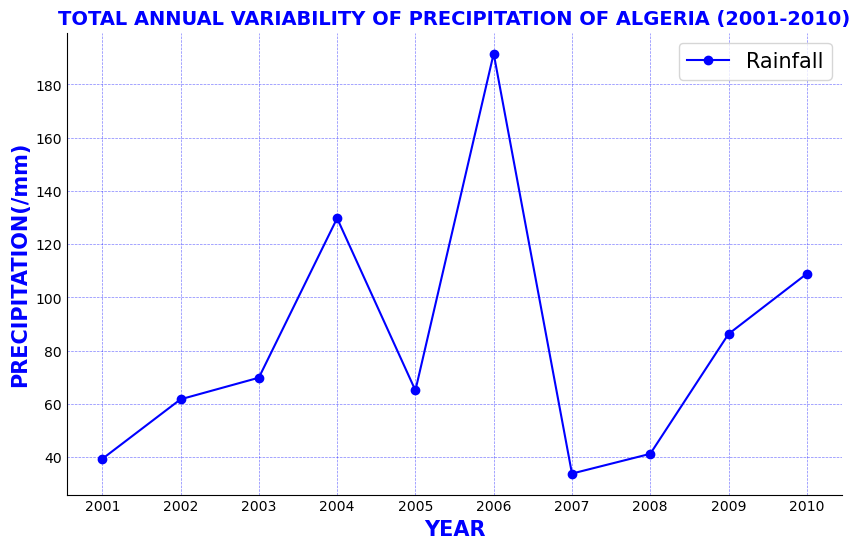

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Annual_Totals1['year'], Annual_Totals1['Annual Total'], label='Rainfall', color='blue', marker='o')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue')
ax.set_ylabel('PRECIPITATION(/mm)',fontweight='bold',fontsize=15,color='blue')
ax.set_title('TOTAL ANNUAL VARIABILITY OF PRECIPITATION OF ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0) 

fig.savefig('TOTAL ANNUAL VARIABILITY OF PRECIPITATION OF ALGERIA (2001-2010).png', dpi=300, bbox_inches='tight')

In [13]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Annual Climatology': Annual_climatology1}
Annual_climatology1= pd.DataFrame(data=data)
Annual_climatology1

,year,Annual Climatology
0,2001,0.107699
1,2002,0.169014
2,2003,0.191233
3,2004,0.354317
4,2005,0.178164
5,2006,0.524740
6,2007,0.092575
7,2008,0.112904
8,2009,0.236219
9,2010,0.298219


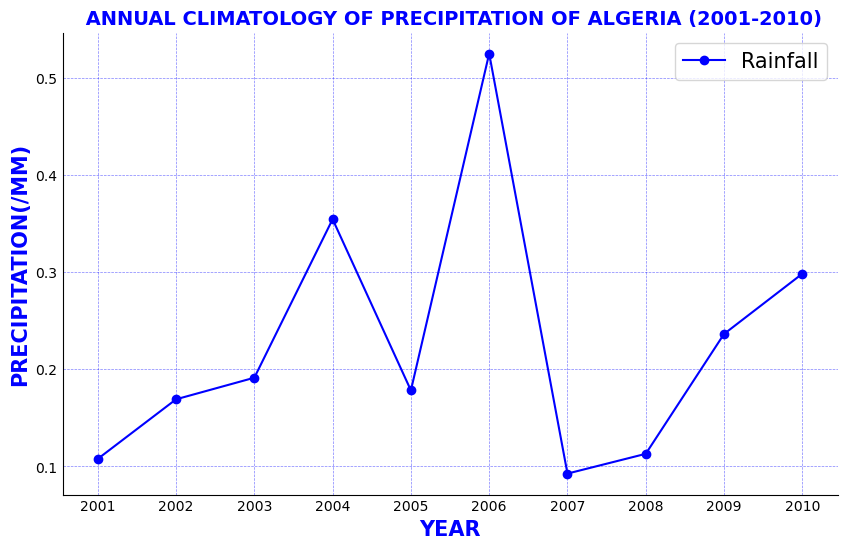

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Annual_climatology1['year'], Annual_climatology1['Annual Climatology'], label='Rainfall', color='blue', marker='o')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('PRECIPITATION(/MM)',fontsize=15,fontweight='bold',color='blue')
ax.set_title(' ANNUAL CLIMATOLOGY OF PRECIPITATION OF ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)

# fig.savefig('your-title.png', dpi=300, bbox_inches='tight')

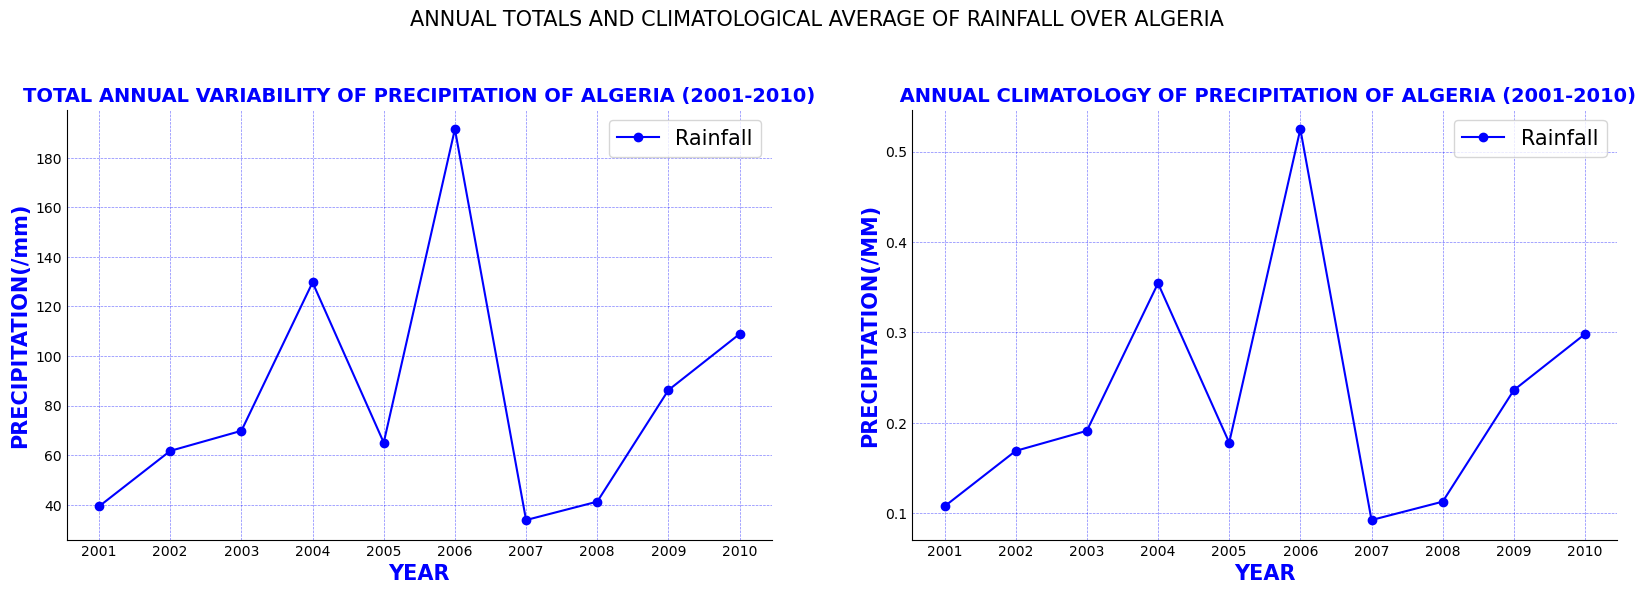

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
plt.subplots_adjust(bottom=0.45,wspace=0.2,hspace=0.6)
fig.suptitle('ANNUAL TOTALS AND CLIMATOLOGICAL AVERAGE OF RAINFALL OVER ALGERIA',fontsize=15)
ax=axes[0]
axes[0].plot(Annual_Totals1['year'], Annual_Totals1['Annual Total'], label='Rainfall', color='blue', marker='o')
axes[0].set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue')
axes[0].set_ylabel('PRECIPITATION(/mm)',fontweight='bold',fontsize=15,color='blue')
axes[0].set_title('TOTAL ANNUAL VARIABILITY OF PRECIPITATION OF ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[0].legend(fontsize=15)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
axes[0].tick_params(axis='both', which='both', length=0) 

axes[1].plot(Annual_climatology1['year'], Annual_climatology1['Annual Climatology'], label='Rainfall', color='blue', marker='o')
axes[1].set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
axes[1].set_ylabel('PRECIPITATION(/MM)',fontsize=15,fontweight='bold',color='blue')
axes[1].set_title(' ANNUAL CLIMATOLOGY OF PRECIPITATION OF ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[1].legend(fontsize=15)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
axes[1].tick_params(axis='both', which='both', length=0)


fig.savefig('TOTAL ANNUAL VARIABILITY OF PRECIPITATION OF ALGERIA (2001-2010).png', dpi=300, bbox_inches='tight')

# COMPUTING DRY(<1MM) AND WET DAYS(>1MM)

PER YEAR

In [16]:
ds = Algeria_precip

# Select the precipitation variable and compute the number of dry days per year
dry_days_per_year = (ds <1).groupby('datetime.year').sum(dim='datetime')
dry_days_per_year1=dry_days_per_year.values
dry_days_per_year1

array([354, 345, 346, 344, 349, 335, 357, 353, 353, 340])

In [17]:
dry_days_per_year 

<xarray.DataArray 'precip' (year: 10)>
array([354, 345, 346, 344, 349, 335, 357, 353, 353, 340])
Coordinates:
    lon      float32 1.75
    lat      float32 28.0
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

In [18]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Dry days': dry_days_per_year1}
Dry_days1= pd.DataFrame(data=data)
Dry_days1

,year,Dry days
0,2001,354
1,2002,345
2,2003,346
3,2004,344
4,2005,349
5,2006,335
6,2007,357
7,2008,353
8,2009,353
9,2010,340


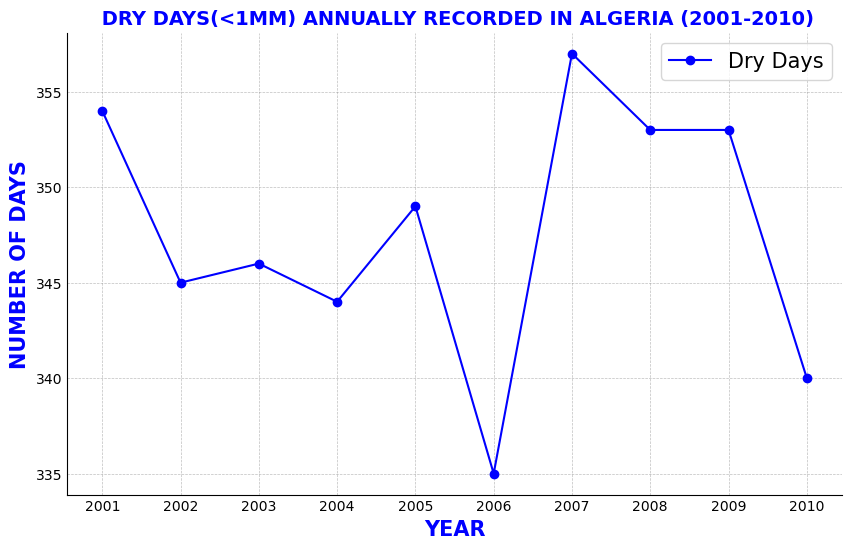

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Dry_days1['year'], Dry_days1['Dry days'], label='Dry Days', color='blue', marker='o')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
ax.set_title(' DRY DAYS(<1MM) ANNUALLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)


In [20]:
ds = Algeria_precip

# Select the precipitation variable and compute the number of wet days per year
wet_days_per_year = (ds >= 1).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year 
wet_days_per_year=wet_days_per_year.values
wet_days_per_year

array([11, 20, 19, 22, 16, 30,  8, 12, 12, 25])

In [21]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Wet days': wet_days_per_year}
Wet_days= pd.DataFrame(data=data)
Wet_days

,year,Wet days
0,2001,11
1,2002,20
2,2003,19
3,2004,22
4,2005,16
5,2006,30
6,2007,8
7,2008,12
8,2009,12
9,2010,25


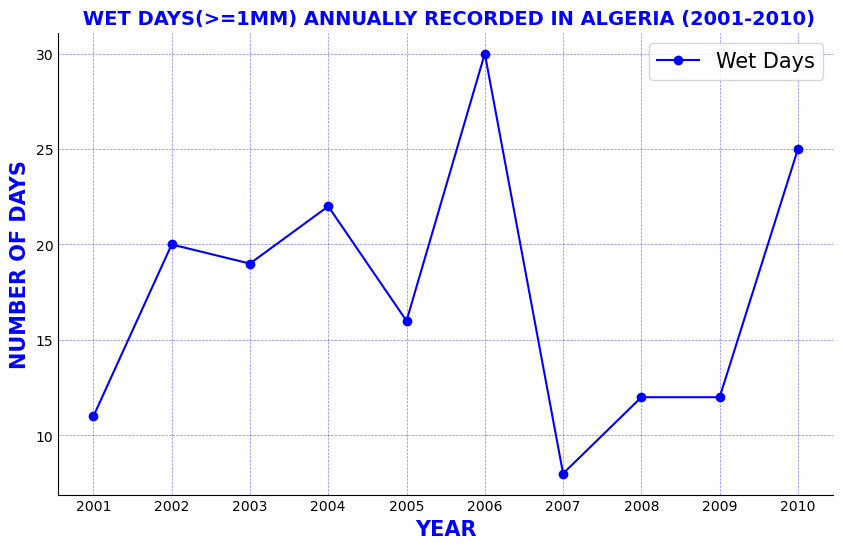

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['year'], Wet_days['Wet days'], label='Wet Days', color='blue', marker='o')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
ax.set_title(' WET DAYS(>=1MM) ANNUALLY RECORDED IN ALGERIA (2001-2010)',fontsize=14,fontweight='bold',color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)


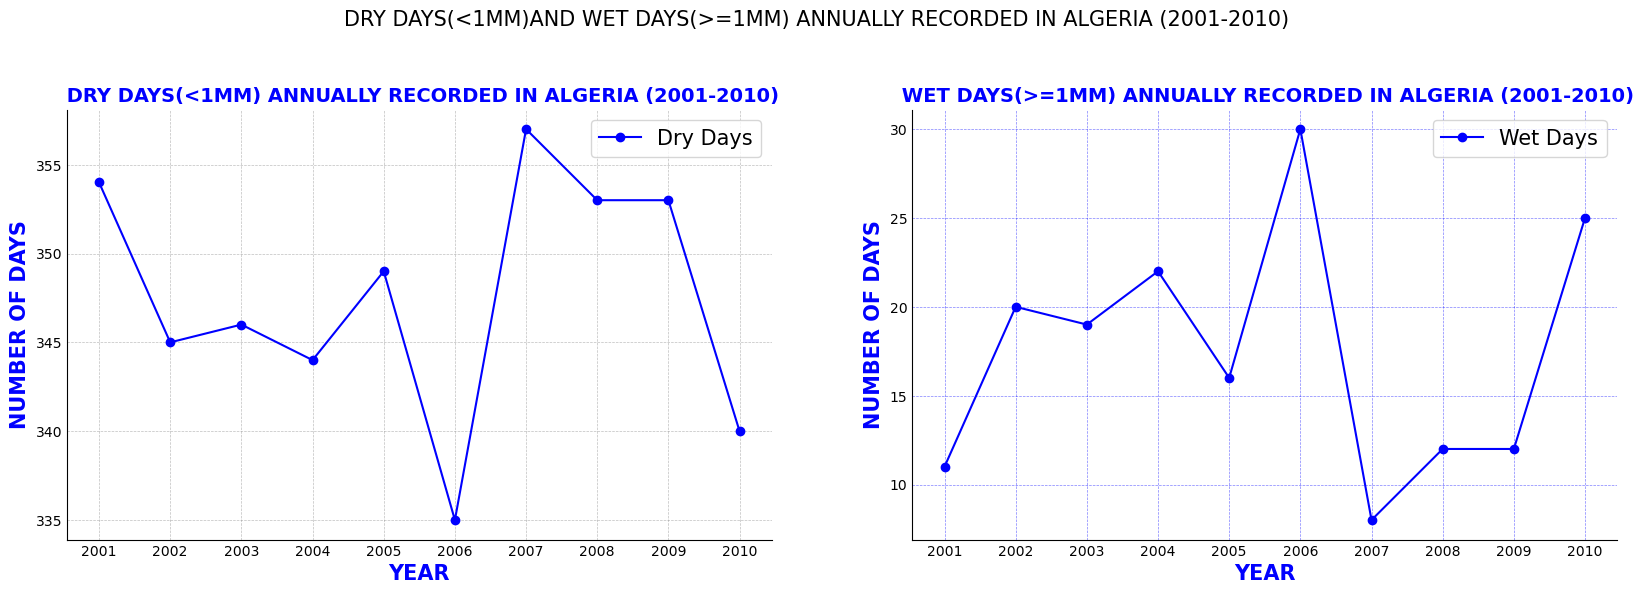

In [23]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
plt.subplots_adjust(bottom=0.45,wspace=0.2,hspace=0.6)
fig.suptitle('DRY DAYS(<1MM)AND WET DAYS(>=1MM) ANNUALLY RECORDED IN ALGERIA (2001-2010)',fontsize=15)
#fig, ax = plt.subplots(figsize=(10, 6))
ax=axes[0]
axes[0].plot(Dry_days1['year'], Dry_days1['Dry days'], label='Dry Days', color='blue', marker='o')
axes[0].set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
axes[0].set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
axes[0].set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
axes[0].set_title(' DRY DAYS(<1MM) ANNUALLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[0].legend(fontsize=15)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
axes[0].tick_params(axis='both', which='both', length=0)

#fig, ax = plt.subplots(figsize=(10, 6))
axes[1].plot(Wet_days['year'], Wet_days['Wet days'], label='Wet Days', color='blue', marker='o')
axes[1].set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
axes[1].set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
axes[1].set_title(' WET DAYS(>=1MM) ANNUALLY RECORDED IN ALGERIA (2001-2010)',fontsize=14,fontweight='bold',color='blue')
axes[1].legend(fontsize=15)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
axes[1].tick_params(axis='both', which='both', length=0)

PER MONTH

In [24]:
ds = Algeria_precip

# Select the precipitation variable and compute the number of dry days per year
dry_days_per_month = (ds < 1).groupby('datetime.month').sum(dim='datetime')
dry_days_per_month=dry_days_per_month.values
dry_days_per_month

array([307, 261, 295, 281, 290, 281, 305, 296, 276, 293, 291, 300])

In [25]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 
        'dry days': dry_days_per_month}
Dry_days= pd.DataFrame(data=data)
Dry_days

,months,dry days
0,Jan,307
1,Feb,261
2,Mar,295
3,Apr,281
4,May,290
5,Jun,281
6,July,305
7,Aug,296
8,Sept,276
9,Oct,293


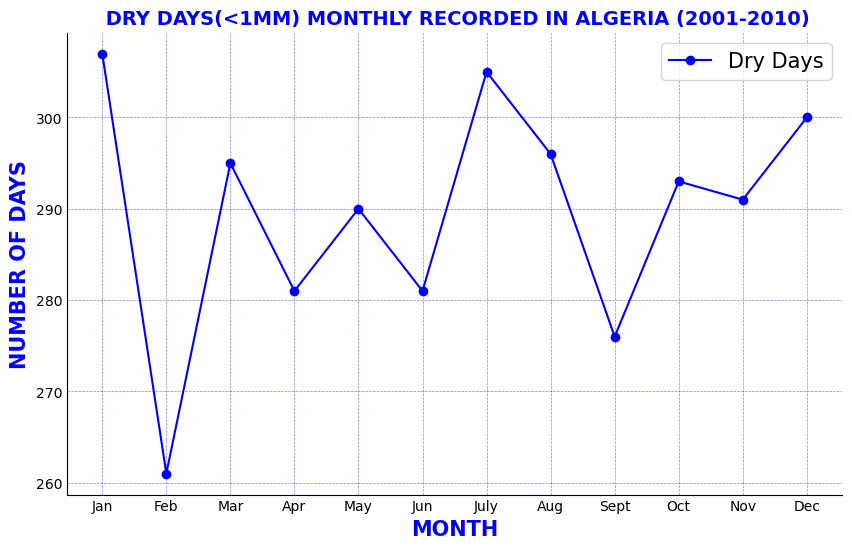

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Dry_days['months'], Dry_days['dry days'], label='Dry Days', color='blue', marker='o')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
ax.set_title(' DRY DAYS(<1MM) MONTHLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)


In [27]:
ds = Algeria_precip

# Select the precipitation variable and compute the number of dry days per year
wet_days_per_month = (ds>=1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month=wet_days_per_month.values
wet_days_per_month

array([ 3, 21, 14, 19, 20, 19,  5, 14, 24, 17,  9, 10])

In [28]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 
        'wet days': wet_days_per_month}
Wet_days= pd.DataFrame(data=data)
Wet_days

,months,wet days
0,Jan,3
1,Feb,21
2,Mar,14
3,Apr,19
4,May,20
5,Jun,19
6,July,5
7,Aug,14
8,Sept,24
9,Oct,17


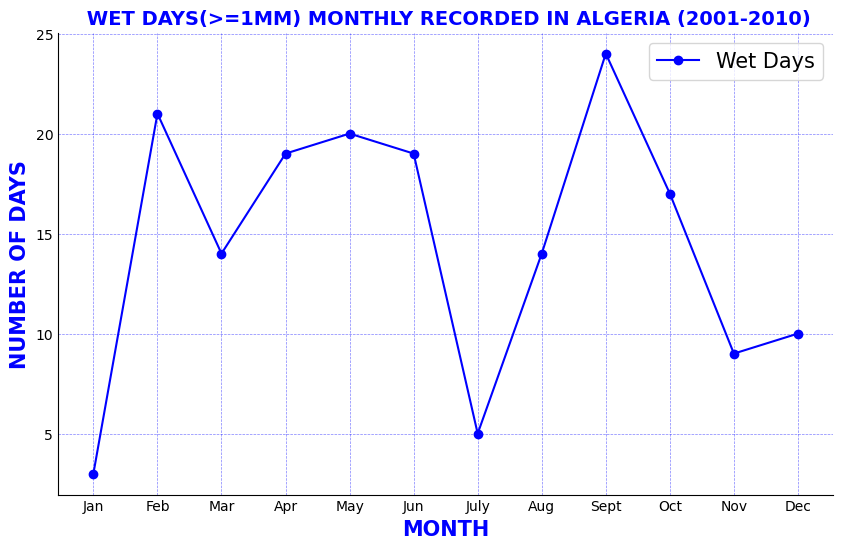

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['months'],Wet_days['wet days'], label='Wet Days', color='blue', marker='o')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
ax.set_title(' WET DAYS(>=1MM) MONTHLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)


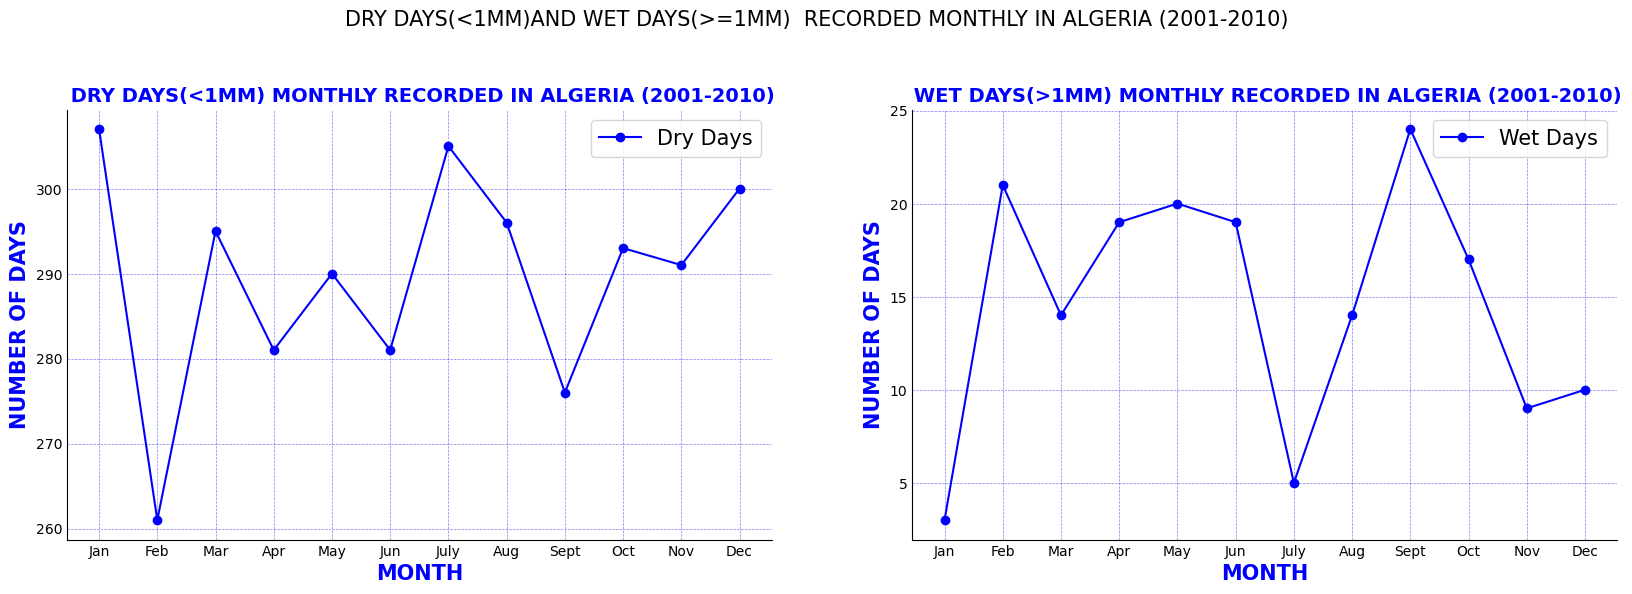

In [30]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
plt.subplots_adjust(bottom=0.45,wspace=0.2,hspace=0.6)
fig.suptitle('DRY DAYS(<1MM)AND WET DAYS(>=1MM)  RECORDED MONTHLY IN ALGERIA (2001-2010)',fontsize=15)
ax=axes[0]
axes[0].plot(Dry_days['months'], Dry_days['dry days'], label='Dry Days', color='blue', marker='o')
axes[0].set_xlabel('MONTH',fontsize=15,fontweight='bold',color='blue',)
axes[0].set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
axes[0].set_title(' DRY DAYS(<1MM) MONTHLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[0].legend(fontsize=15)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
axes[0].tick_params(axis='both', which='both', length=0)



axes[1].plot(Wet_days['months'],Wet_days['wet days'], label='Wet Days', color='blue', marker='o')
axes[1].set_xlabel('MONTH',fontsize=15,fontweight='bold',color='blue',)
axes[1].set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
axes[1].set_title(' WET DAYS(>1MM) MONTHLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[1].legend(fontsize=15)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
axes[1].tick_params(axis='both', which='both', length=0)

# SPATIAL PLOTS

Spatial Plot added embed in the 2(second) notebook in the Appendix link

# EXTREME RAINFALL INDICES (RR>10MM),(RR>20MM)

# YEARLY WET (>10MM)

In [31]:
# Select the precipitation variable and compute the number of dry days per year
wet_days_per_year = (ds>10).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year=wet_days_per_year.values
wet_days_per_year

array([0, 0, 0, 3, 0, 4, 0, 0, 2, 0])

In [32]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Wet days': wet_days_per_year}
Wet_days= pd.DataFrame(data=data)
Wet_days

,year,Wet days
0,2001,0
1,2002,0
2,2003,0
3,2004,3
4,2005,0
5,2006,4
6,2007,0
7,2008,0
8,2009,2
9,2010,0


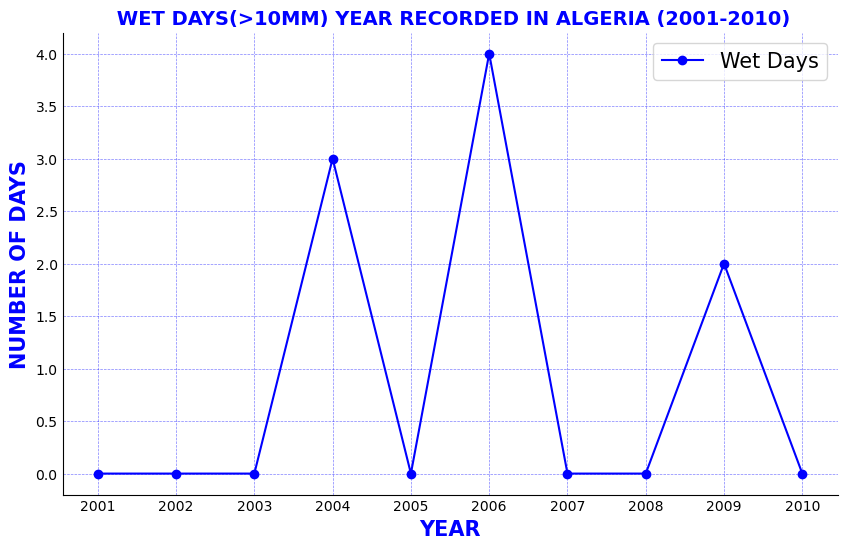

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['year'],Wet_days['Wet days'], label='Wet Days', color='blue', marker='o')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
ax.set_title(' WET DAYS(>10MM) YEAR RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)

# YEARLY WET (>20MM)

In [34]:
wet_days_per_year = (ds >20).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year 
wet_days_per_year=wet_days_per_year.values
wet_days_per_year

array([0, 0, 0, 0, 0, 2, 0, 0, 1, 0])

In [35]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Wet days': wet_days_per_year}
Wet_days1= pd.DataFrame(data=data)
Wet_days1

,year,Wet days
0,2001,0
1,2002,0
2,2003,0
3,2004,0
4,2005,0
5,2006,2
6,2007,0
7,2008,0
8,2009,1
9,2010,0


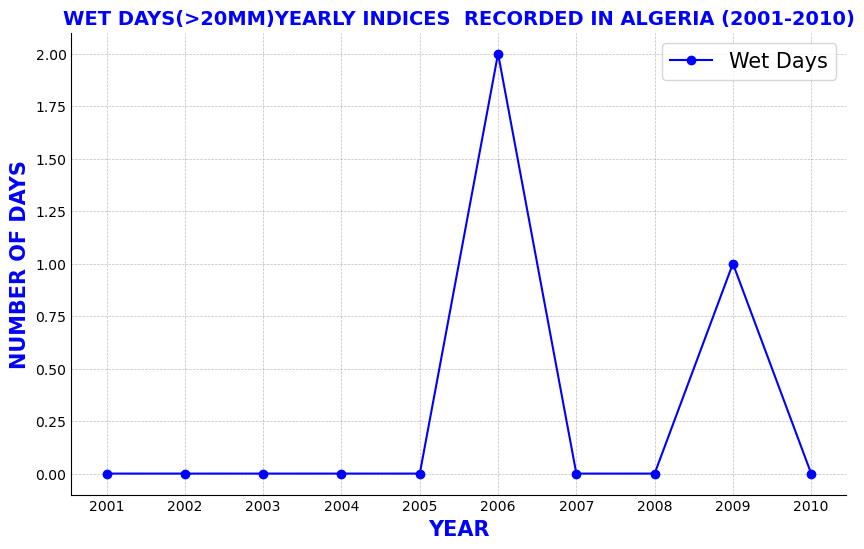

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days1['year'],Wet_days1['Wet days'], label='Wet Days', color='blue', marker='o')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
ax.set_title('WET DAYS(>20MM)YEARLY INDICES  RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)

# MONTHLY WET DAYS(>10MM)

In [37]:
wet_days_per_month = (ds>10).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month=wet_days_per_month.values
wet_days_per_month

array([0, 0, 3, 0, 2, 1, 0, 0, 3, 0, 0, 0])

In [38]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 
        'wet days': wet_days_per_month}
Wet_days2= pd.DataFrame(data=data)
Wet_days2

,months,wet days
0,Jan,0
1,Feb,0
2,Mar,3
3,Apr,0
4,May,2
5,Jun,1
6,July,0
7,Aug,0
8,Sept,3
9,Oct,0


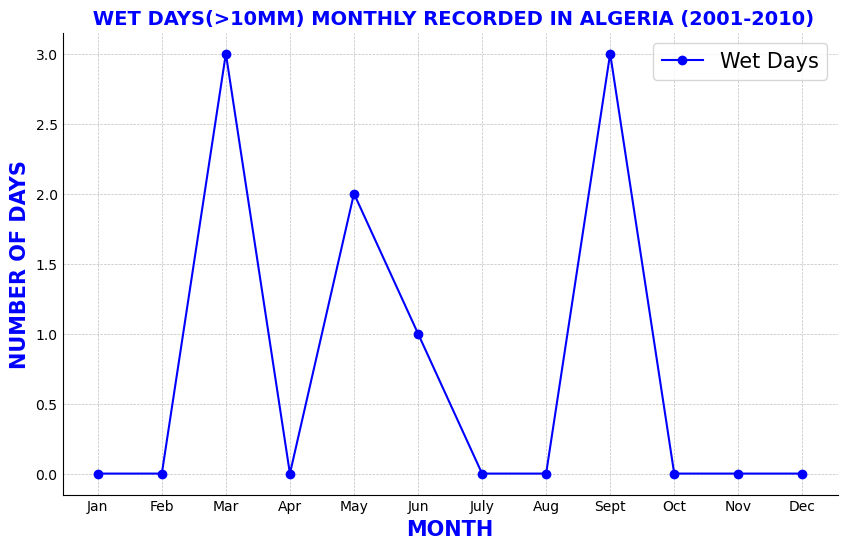

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days2['months'], Wet_days2['wet days'], label='Wet Days', color='blue', marker='o')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
ax.set_title(' WET DAYS(>10MM) MONTHLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)


# MONTHLY INDICES(>20MM)

In [40]:
wet_days_per_month = (ds>20).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month=wet_days_per_month.values
wet_days_per_month

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [41]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 
        'wet days': wet_days_per_month}
Wet_days3= pd.DataFrame(data=data)
Wet_days3

,months,wet days
0,Jan,0
1,Feb,0
2,Mar,0
3,Apr,0
4,May,1
5,Jun,1
6,July,0
7,Aug,0
8,Sept,1
9,Oct,0


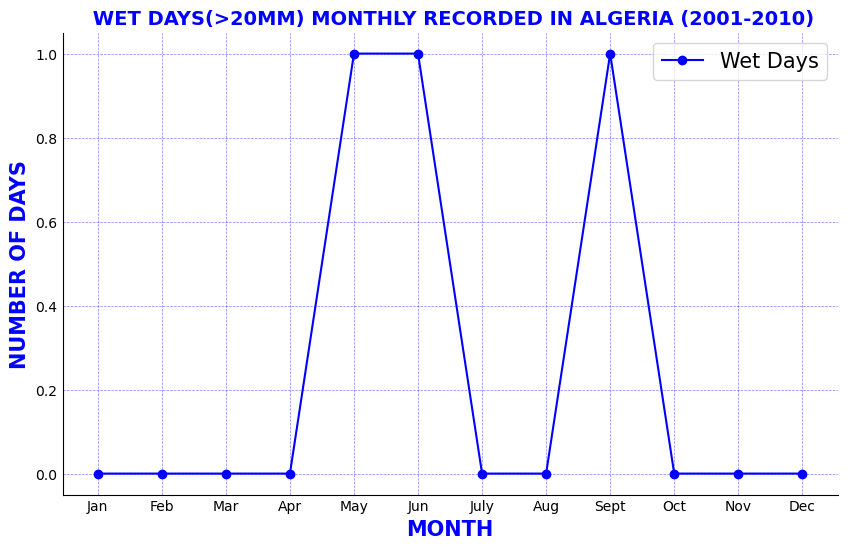

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days3['months'], Wet_days3['wet days'], label='Wet Days', color='blue', marker='o')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='blue',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
ax.set_title(' WET DAYS(>20MM) MONTHLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)

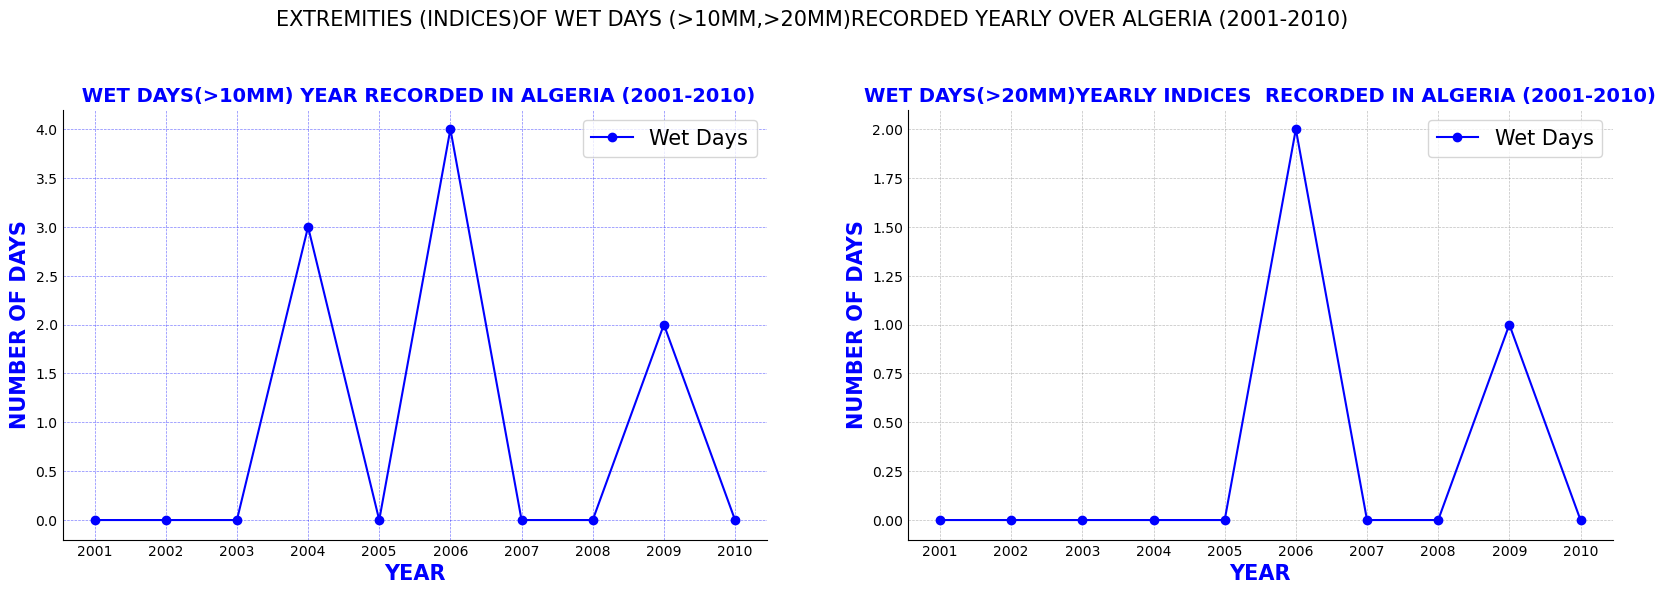

In [43]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
plt.subplots_adjust(bottom=0.45,wspace=0.2,hspace=0.6)
fig.suptitle('EXTREMITIES (INDICES)OF WET DAYS (>10MM,>20MM)RECORDED YEARLY OVER ALGERIA (2001-2010)',fontsize=15)
ax=axes[0]
#fig, ax = plt.subplots(figsize=(10, 6))
axes[0].plot(Wet_days['year'],Wet_days['Wet days'], label='Wet Days', color='blue', marker='o')
axes[0].set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
axes[0].set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
axes[0].set_title(' WET DAYS(>10MM) YEAR RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[0].legend(fontsize=15)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
axes[0].tick_params(axis='both', which='both', length=0)

axes[1].plot(Wet_days1['year'],Wet_days1['Wet days'], label='Wet Days', color='blue', marker='o')
axes[1].set_xlabel('YEAR',fontsize=15,fontweight='bold',color='blue',)
axes[1].set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
axes[1].set_title('WET DAYS(>20MM)YEARLY INDICES  RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[1].legend(fontsize=15)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
axes[1].tick_params(axis='both', which='both', length=0)



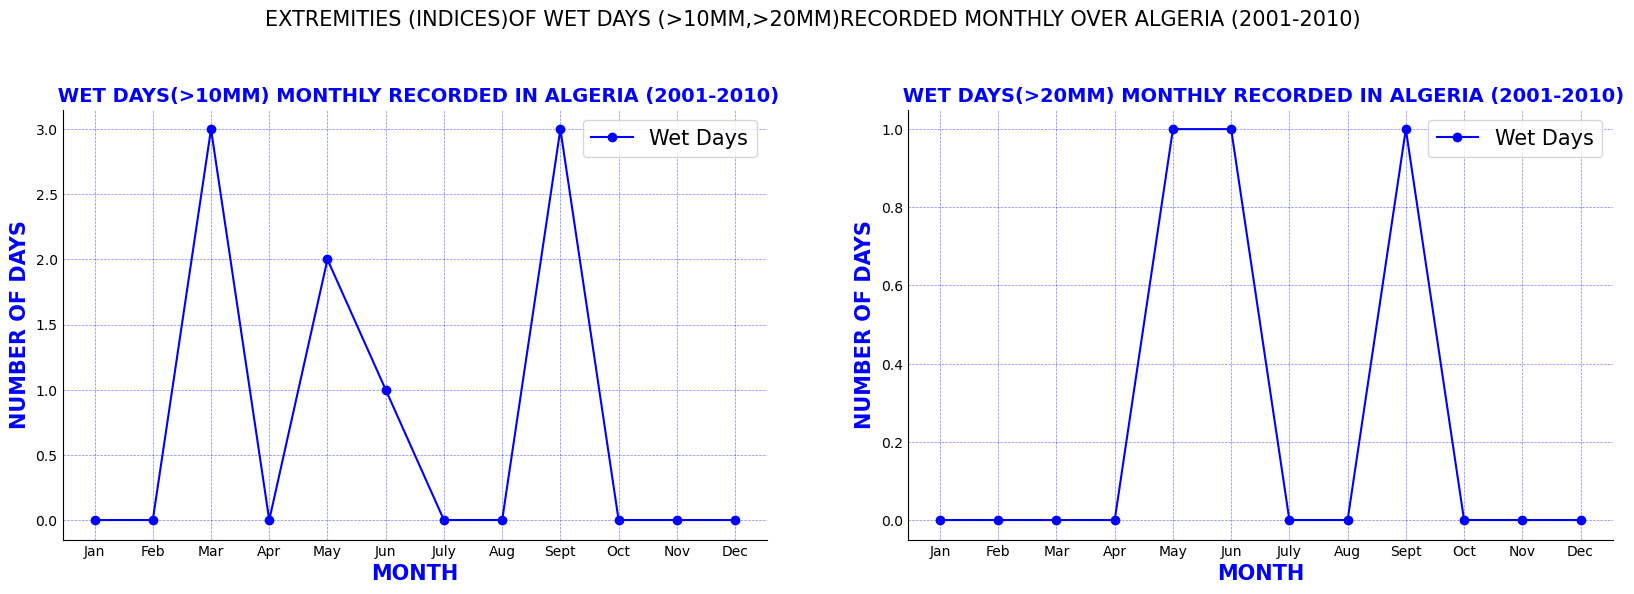

In [44]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
plt.subplots_adjust(bottom=0.45,wspace=0.2,hspace=0.6)
fig.suptitle('EXTREMITIES (INDICES)OF WET DAYS (>10MM,>20MM)RECORDED MONTHLY OVER ALGERIA (2001-2010)',fontsize=15)
ax=axes[0]

axes[0].plot(Wet_days2['months'], Wet_days2['wet days'], label='Wet Days', color='blue', marker='o')
axes[0].set_xlabel('MONTH',fontsize=15,fontweight='bold',color='blue',)
axes[0].set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
axes[0].set_title(' WET DAYS(>10MM) MONTHLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[0].legend(fontsize=15)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
axes[0].tick_params(axis='both', which='both', length=0)

axes[1].plot(Wet_days3['months'], Wet_days3['wet days'], label='Wet Days', color='blue', marker='o')
axes[1].set_xlabel('MONTH',fontsize=15,fontweight='bold',color='blue',)
axes[1].set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='blue')
axes[1].set_title(' WET DAYS(>20MM) MONTHLY RECORDED IN ALGERIA (2001-2010)',fontweight='bold',fontsize=14,color='blue')
axes[1].legend(fontsize=15)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(linestyle='--', linewidth=0.5, color='blue', alpha=0.5)
axes[1].tick_params(axis='both', which='both', length=0)

# fig.savefig('your-title.png', dpi=300, bbox_inches='tight')
# # # fig.savefig('your-title.png', dpi=300, bbox_inches='tight')


# <font color="blue"><h1>```THANK YOU```</h1></font>

# <h1 style="color:blue; text-align:center;font-size:3rem">END OF CODE &#128512; || @DREW &#128525;</h1>